# Exercises week 35

## Deriving and Implementing Ordinary Least Squares

This week you will be deriving the analytical expressions for linear regression, building up the model from scratch. This will include taking several derivatives of products of vectors and matrices. Such derivatives are central to the optimization of many machine learning models. Although we will often use automatic differentiation in actual calculations, to be able to have analytical expressions is extremely helpful in case we have simpler derivatives as well as when we analyze various properties (like second derivatives) of the chosen cost functions.

Vectors are always written as boldfaced lower case letters and matrices as upper case boldfaced letters. You will find useful the notes from week 35 on derivatives of vectors and matrices. See also the textbook of Faisal at al, chapter 5 and in particular sections 5.3-5.5 at <https://github.com/CompPhysics/MachineLearning/blob/master/doc/Textbooks/MathMLbook.pdf>

### Learning goals

After completing these exercises, you will know how to
- Take the derivatives of simple products between vectors and matrices
- Implement OLS using the analytical expressions
- Create a feature matrix from a set of data
- Create a feature matrix for a polynomial model
- Evaluate the MSE score of various model on training and test data, and comparing their performance

### Deliverables

Complete the following exercises while working in a jupyter notebook. Then, in canvas, include
- The jupyter notebook with the exercises completed
- An exported PDF of the notebook (https://code.visualstudio.com/docs/datascience/jupyter-notebooks#_export-your-jupyter-notebook)

## How to take derivatives of Matrix-Vector expressions

In these exercises it is always useful to write out with summation indices the various quantities. Take also a look at the weekly slides from week 35 and the various examples included there.

As an example, consider the function

$$
f(\boldsymbol{x}) =\boldsymbol{A}\boldsymbol{x},
$$

which reads for a specific component $f_i$ (we define the matrix $\boldsymbol{A}$ to have dimension $n\times n$ and the vector $\boldsymbol{x}$ to have length $n$)

$$
f_i =\sum_{j=0}^{n-1}a_{ij}x_j,
$$

which leads to

$$
\frac{\partial f_i}{\partial x_j}= a_{ij},
$$

and written out in terms of the vector $\boldsymbol{x}$ we have

$$
\frac{\partial f(\boldsymbol{x})}{\partial \boldsymbol{x}}= \boldsymbol{A}.
$$

## Exercise 1 - Finding the derivative of Matrix-Vector expressions

**a)** Consider the expression

$$
\frac{\partial (\boldsymbol{a}^T\boldsymbol{x})}{\partial \boldsymbol{x}},
$$

Where $\boldsymbol{a}$ and $\boldsymbol{x}$ are column-vectors with length $n$.

What is the *shape* of the expression we are taking the derivative of?

What is the *shape* of the thing we are taking the derivative with respect to?

What is the *shape* of the result of the expression?

**Answer:**
The expression we are taking the derivative of is just a scalar. This because the dot product of two vectors yield a scalar. 
The shape of what we are taking the derivate with respect to is n (the shape of x). 
The shape of the ouput will be n. 

**b)** Show that

$$
\frac{\partial (\boldsymbol{a}^T\boldsymbol{x})}{\partial \boldsymbol{x}} = \boldsymbol{a}^T,
$$

**Answer:**
The vector $a^T$ can be seen as a matrix of size $1\times n$. From the calculations above what will change is that the expression 
$$
\frac{\partial f_i}{\partial x_j}= a_{ij},
$$
will only be for a single $i$. So we get 
$$
\frac{\partial f}{\partial x_j}= a_{j},
$$
Meaning that the output will be 
$$
\frac{\partial f(\boldsymbol{x})}{\partial \boldsymbol{x}}= {a_0, a_1,...,a_n-1}.
$$
Substituting the symbols and we get 
$$
\frac{\partial (\boldsymbol{a}^T\boldsymbol{x})}{\partial \boldsymbol{x}} = \boldsymbol{a}^T,
$$

**c)** Show that

$$
\frac{\partial (\boldsymbol{a}^T\boldsymbol{A}\boldsymbol{a})}{\partial \boldsymbol{a}} = \boldsymbol{a}^T(\boldsymbol{A}+\boldsymbol{A}^T),
$$

**Asnwer:** 
$$
\boldsymbol{a}^T\boldsymbol{A}\boldsymbol{a}=\sum_{i=0}^{n-1}a_i\sum_{j=0}^{n-1}a_{ij}a_j
$$

$$
=\sum_{i\in [0,n-1]\setminus k}a_i \sum_{i\in [0,n-1]\setminus k}a_{ij}a_j + \sum_{i\in [0,n-1]\setminus k}a_i a_{ik}a_k + a_k \sum_{i\in [0,n-1]\setminus k}a_{kj}a_j +a_k a_{kk} a_k
$$
If we take the partial derivative with respect to $a_k$ we get 
$$
\sum_{i\in [0,n-1]\setminus k}a_i a_{ik} + \sum_{i\in [0,n-1]\setminus k}a_{kj}a_j +2a_k a_{kk}
$$
$$
=\sum_{i\in [0,n-1]}a_i a_{ik} + \sum_{i\in [0,n-1]}a_{kj}a_j
$$
Summing this over all $n$ we get the desiered result. 

## Exercise 2 - Deriving the expression for OLS

The ordinary least squares method finds the parameters $\boldsymbol{\theta}$ which minimizes the squared error between our model $\boldsymbol{X\theta}$ and the true values $\boldsymbol{y}$.

To find the parameters $\boldsymbol{\theta}$ which minimizes this error, we take the derivative of the squared error expression with respect to $\boldsymbol{\theta}$, and set it equal to 0.

**a)** Very briefly explain why the approach above finds the parameters $\boldsymbol{\theta}$ which minimizes this error.

**Answer:** 
The method described finds the point where the derivate is 0, e.i. the function is stationary. In this point the function (squared error expression) is either a minima, maxima or saddle point. Methods can be used to find out which one.

We typically write the squared error as

$$
\vert\vert\boldsymbol{y} - \boldsymbol{X\theta}\vert\vert^2
$$

which we can rewrite in matrix-vector form as

$$
\left(\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\theta}\right)^T\left(\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\theta}\right)
$$

**b)** If $\boldsymbol{X}$ is invertible, what is the expression for the optimal parameters $\boldsymbol{\theta}$? (**Hint:** Don't compute any derivatives, but solve $\boldsymbol{X\theta}=\boldsymbol{y}$ for $\boldsymbol{\theta}$)

**Answer:**
We want to minimize $||y-X\theta||^2$.$\\$
If $X$ is invertible, we simply get 
$$
\theta =X^{-1}y
$$
Which is the optimal parameter of $\theta$.

**c)** Show that

$$
\frac{\partial \left(\boldsymbol{x}-\boldsymbol{A}\boldsymbol{s}\right)^T\left(\boldsymbol{x}-\boldsymbol{A}\boldsymbol{s}\right)}{\partial \boldsymbol{s}} = -2\left(\boldsymbol{x}-\boldsymbol{A}\boldsymbol{s}\right)^T\boldsymbol{A},
$$

**Answer:** 
Using the chain rule, we get that 
$$
\frac{\partial \left(\boldsymbol{x}-\boldsymbol{A}\boldsymbol{s}\right)^T\left(\boldsymbol{x}-\boldsymbol{A}\boldsymbol{s}\right)}{\partial \boldsymbol{s}} = \frac{\partial \left(\boldsymbol{x}-\boldsymbol{A}\boldsymbol{s}\right)^T\left(\boldsymbol{x}-\boldsymbol{A}\boldsymbol{s}\right)}{\partial \left(\boldsymbol{x}-\boldsymbol{A}\boldsymbol{s}\right)}\frac{\partial \left(\boldsymbol{x}-\boldsymbol{A}\boldsymbol{s}\right)}{\partial \boldsymbol{s}}
$$
The first of the partial derivatives is on the form in 1c with $A=I$. Using that we get 
$$
=(x-As)^T(I+I^T)(-A)
$$
$$
=-2(x-As)^TA
$$


**d)** Using the expression from **c)**, but substituting back in $\boldsymbol{\theta}$, $\boldsymbol{y}$ and $\boldsymbol{X}$, find the expression for the optimal parameters $\boldsymbol{\theta}$ in the case that $\boldsymbol{X}$ is not invertible, but $\boldsymbol{X^T X}$ is, which is most often the case.

$$
\boldsymbol{\hat{\theta}_{OLS}} = ...
$$

**Answer:**
Substituing we get that the derivate with respect to $\theta$ is 
$$
\frac{\partial \left(\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\theta}\right)^T\left(\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\theta}\right)}{\partial \boldsymbol{\theta}} = -2\left(\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\theta}\right)^T\boldsymbol{X}.
$$
Setting this equal to $0$ and solving for $\theta$ we get 
$$
-2\left(\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\theta}\right)^T\boldsymbol{X}=0
$$
$$
\boldsymbol{y}^TX-\boldsymbol{\theta}^T\boldsymbol{X}^T\boldsymbol{X}=0
$$
$$
\boldsymbol{y}^TX=\boldsymbol{\theta}^T\boldsymbol{X}^T\boldsymbol{X}
$$
Transposing both sides we get 
$$
X^T\boldsymbol{y}=(\boldsymbol{X}^T\boldsymbol{X})^T\boldsymbol{\theta}
$$
$$
X^T\boldsymbol{y}=(\boldsymbol{X}^T\boldsymbol{X})\boldsymbol{\theta}
$$
This means that the $\theta = (\boldsymbol{X}^T\boldsymbol{X})^{-1}X^Ty$. This is also the minimal value since we are dealing with a convex problem. 

## Exercise 3 - Creating feature matrix and implementing OLS using the analytical expression

With the expression for $\boldsymbol{\hat{\theta}_{OLS}}$, you now have what you need to implement OLS regression with your input data and target data $\boldsymbol{y}$. But before you can do that, you need to set up you input data as a feature matrix $\boldsymbol{X}$.

In a feature matrix, each row is a datapoint and each column is a feature of that data. If you want to predict someones spending based on their income and number of children, for instance, you would create a row for each person in your dataset, with the montly income and the number of children as columns.

We typically also include an intercept in our models. The intercept is a value that is added to our prediction regardless of the value of the other features. The intercept tries to account for constant effects in our data that are not dependant on anything else. In our current example, the intercept could account for living expenses which are typical regardless of income or childcare expenses.

We calculate the optimal intercept by including a feature with the constant value of 1 in our model, which is then multplied by some parameter $\theta_0$ from the OLS method into the optimal intercept value (which will be $\theta_0$). In practice, we include the intercept in our model by adding a column of ones to the start of our feature matrix.

In [1]:
import numpy as np

In [2]:
n = 20
income = np.array([116., 161., 167., 118., 172., 163., 179., 173., 162., 116., 101., 176., 178., 172., 143., 135., 160., 101., 149., 125.])
children = np.array([5, 3, 0, 4, 5, 3, 0, 4, 4, 3, 3, 5, 1, 0, 2, 3, 2, 1, 5, 4])
spending = np.array([152., 141., 102., 136., 161., 129.,  99., 159., 160., 107.,  98., 164., 121.,  93., 112., 127., 117.,  69., 156., 131.])


**a)** Create a feature matrix $\boldsymbol{X}$ for the features income and children, including an intercept column of ones at the start.

In [3]:
X = np.zeros((n, 3))
X[:, 0] = np.ones(n)
X[:, 1] = income
X[:, 2] = children

**b)** Use the expression from **3d)** to find the optimal parameters $\boldsymbol{\hat{\beta}_{OLS}}$ for predicting spending based on these features. Create a function for this operation, as you are going to need to use it a lot.

In [15]:
def OLS_parameters(X, y):
    return np.linalg.inv(X.T @ X) @ X.T @ y

y = spending
beta = OLS_parameters(X, y)
print(beta)

[ 9.12808583  0.5119025  14.60743095]


## Exercise 4 - Fitting a polynomial

In this course, we typically do linear regression using polynomials, though in real world applications it is also very common to make linear models based on measured features like you did in the previous exercise.

When fitting a polynomial with linear regression, we make each polynomial degree($x, x^2, x^3, ..., x^p$) its own feature.

In [44]:
n = 100
x = np.linspace(-3, 3, n)
y = np.exp(-x**2) + 1.5 * np.exp(-(x-2)**2) + np.random.normal(0, 0.1)

**a)** Create a feature matrix $\boldsymbol{X}$ for the features $x, x^2, x^3, x^4, x^5$, including an intercept column of ones at the start. Make this into a function, as you will do this a lot over the next weeks.

In [ ]:
def polynomial_features(x, p):
    return x[:, None] ** np.arange(p+1)
    
X = polynomial_features(x, 5)
print(X)

[[ 1.00000000e+00 -3.00000000e+00  9.00000000e+00 -2.70000000e+01
   8.10000000e+01 -2.43000000e+02]
 [ 1.00000000e+00 -2.93939394e+00  8.64003673e+00 -2.53964716e+01
   7.46502347e+01 -2.19426447e+02]
 [ 1.00000000e+00 -2.87878788e+00  8.28741965e+00 -2.38577232e+01
   6.86813245e+01 -1.97718964e+02]
 [ 1.00000000e+00 -2.81818182e+00  7.94214876e+00 -2.23824192e+01
   6.30777269e+01 -1.77764503e+02]
 [ 1.00000000e+00 -2.75757576e+00  7.60422406e+00 -2.09692239e+01
   5.78242235e+01 -1.59454677e+02]
 [ 1.00000000e+00 -2.69696970e+00  7.27364555e+00 -1.96168016e+01
   5.29059195e+01 -1.42685662e+02]
 [ 1.00000000e+00 -2.63636364e+00  6.95041322e+00 -1.83238167e+01
   4.83082440e+01 -1.27358098e+02]
 [ 1.00000000e+00 -2.57575758e+00  6.63452709e+00 -1.70889334e+01
   4.40169497e+01 -1.13376992e+02]
 [ 1.00000000e+00 -2.51515152e+00  6.32598714e+00 -1.59108162e+01
   4.00181133e+01 -1.00651618e+02]
 [ 1.00000000e+00 -2.45454545e+00  6.02479339e+00 -1.47881292e+01
   3.62981354e+01 -8.9095

**b)** Use the expression from **3d)** to find the optimal parameters $\boldsymbol{\hat{\beta}_{OLS}}$ for predicting $\boldsymbol{y}$ based on these features. If you have done everything right so far, this code will not need changing.

In [106]:
beta = OLS_parameters(X, y)
print(beta)

[ 0.83909735  0.45061271 -0.02326439 -0.03607439 -0.0034652 ]


**c)** Like in exercise 4 last week, split your feature matrix and target data into a training split and test split.

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

**d)** Train your model on the training data(find the parameters which best fit) and compute the MSE on both the training and test data.

In [ ]:
def MSE(x, y):
    return np.sum((x - y)**2) / x.shape[0]

beta = OLS_parameters(X_train, y_train)

prediction = X_train @ beta
MSE_train = MSE(prediction, y_train)
print(MSE_train)

prediction = X_test @ beta
MSE_test = MSE(prediction, y_test)
print(MSE_test)

[ 0.76780559  0.444806   -0.02242262 -0.03521726 -0.00381624]
0.021295736746142695
0.020273160324610344


**e)** Do the same for each polynomial degree from 2 to 10, and plot the MSE on both the training and test data as a function of polynomial degree. The aim is to reproduce Figure 2.11 of [Hastie et al](https://github.com/CompPhysics/MLErasmus/blob/master/doc/Textbooks/elementsstat.pdf). Feel free to read the discussions leading to figure 2.11 of Hastie et al. 

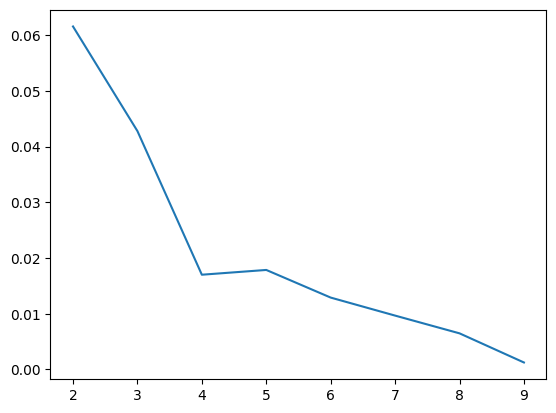

In [119]:
from matplotlib import pyplot as plt

x_tr, x_te, y_tr, y_te = train_test_split(x, y, test_size=0.2, shuffle=True)

ls = []
for i in range(2, 10):
    x_tr1 = polynomial_features(x_tr, i)
    x_te1 = polynomial_features(x_te, i)

    beta = OLS_parameters(x_tr1, y_tr)
    prediction = x_te1 @ beta
    ls.append(MSE(prediction, y_te))

plt.plot(np.arange(2, 10), ls)
plt.show()

**f)** Interpret the graph. Why do the lines move as they do? What does it tell us about model performance and generalizability?

The graph tells us that the higher the degree of the polynommial, the better the fit. This seems fair since, the higher the degree, the more information the function can contain. Hence less loss. 

## Exercise 5 - Comparing your code with sklearn

When implementing different algorithms for the first time, it can be helpful to double check your results with established implementations before you go on to add more complexity.

**a)** Make sure your `polynomial_features` function creates the same feature matrix as sklearns PolynomialFeatures.

(https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)

In [ ]:
import sklearn.preprocessing as sp

pf = sp.PolynomialFeatures(4, include_bias=True)
X_new = pf.fit_transform(x.reshape(-1, 1))
print(X_new)

[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  3.55271368e-15
  -1.42108547e-14]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 -3.55271368e-15
   0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   7.10542736e-15]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 -1.77635684e-15
   7.10542736e-15]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   7.10542736e-15]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00

**b)** Make sure your `OLS_parameters` function computes the same parameters as sklearns LinearRegression with fit_intercept set to False, since the intercept is included in the feature matrix. Use `your_model_object.coef_` to extract the computed parameters.

(https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

In [ ]:
import sklearn.linear_model as sl

lg = sl.LinearRegression()
r = lg.fit(X_new, y)
print(r.coef_)

[ 0.          0.45061271 -0.02326439 -0.03607439 -0.0034652 ]
